# Supplementary figure 5: subsampling and permutation to explore the effect of cell number on CCC

In this notebook, we explore the effect of different number of cells between the defined locations, as maybe the number of predicted CCC is influenciated by that. 

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import random
import ktplotspy as kpy
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method
from collections import Counter
from tqdm import tqdm

import sys
sys.path.insert(1, global_path + 'Functions/')
from downstream_analysis import run_cellphonedb, create_filtered_adata_CP_subsampling, boxplot_subsampling
plt.rcParams['font.family'] = 'FreeSans' 
from adjustText import adjust_text
title_size = 12
labelout_size = 10
label_size = 8
ticks_size = 6

## Sampling

In [3]:
patients = ['CID44971','CID4465', 'CID4535', 'CID4290']
list_loc_labels = ['#B16BA8', '#F39426']
cpdb_file_path = global_path + 'Data/cellphonedb.zip' # CellPhoneDB file (downloaded from their github)

In [ ]:
for patient in patients:
    counts_file_path = global_path + 'Data/Breast/Input_CP/'+patient+'_adata_cancer_region_ass.h5ad'
    adata_out = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/subsampling.h5ad'
    meta_out = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/metadata_subsampling.tsv'
    out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'
    
    df_counts_total = pd.DataFrame(columns=list_loc_labels)

    for i in tqdm(range(10)):
            adata_cp = create_filtered_adata_CP_subsampling(counts_file_path, out_path, list_loc_labels)
            counts_df = run_cellphonedb(cpdb_file_path, meta_out, adata_out, out_path, 'celltype_loc', list_loc_labels)
            df_counts_total = pd.concat([df_counts_total, counts_df])

    df_counts_total.reset_index(inplace=True)
    df_plot = pd.melt(df_counts_total, id_vars='index', var_name='celltype', value_name='inter')
    df_plot.to_csv(out_path + 'total_subsampling_results.csv')


## CID4465

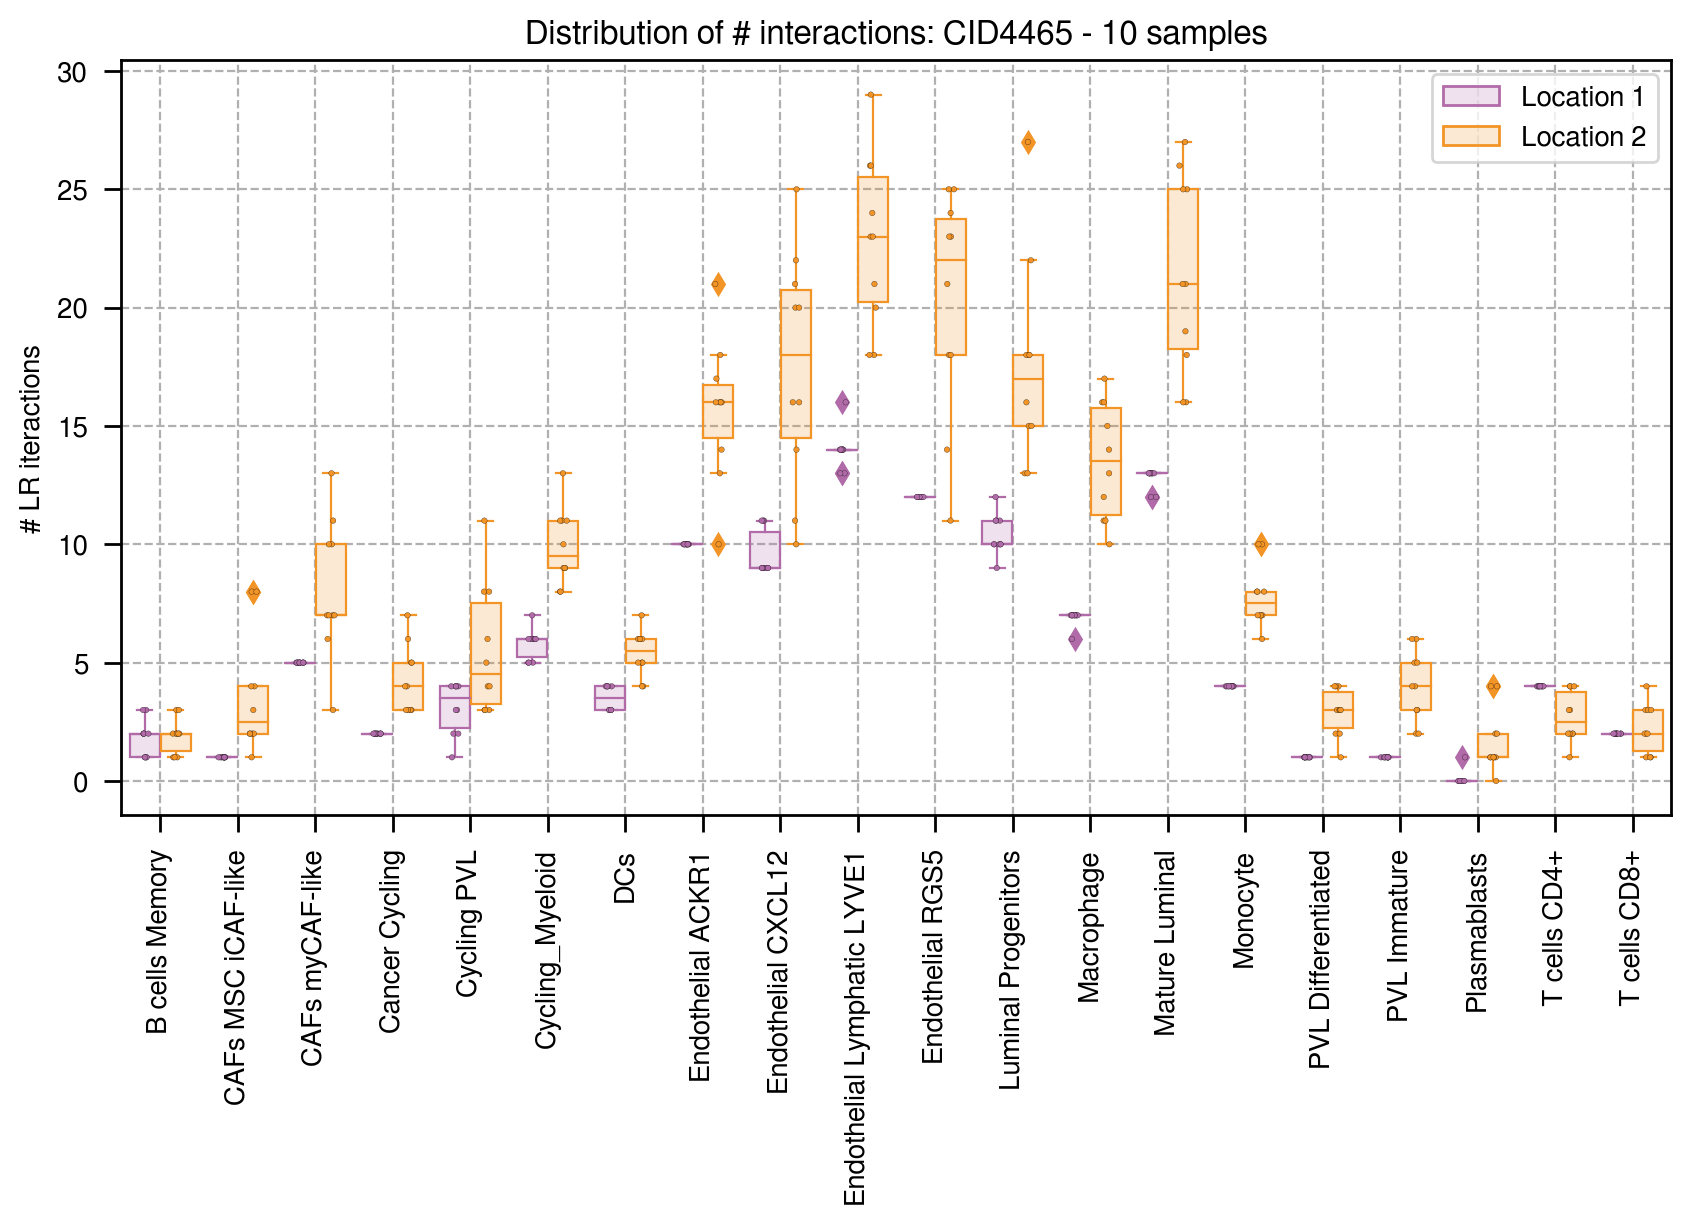

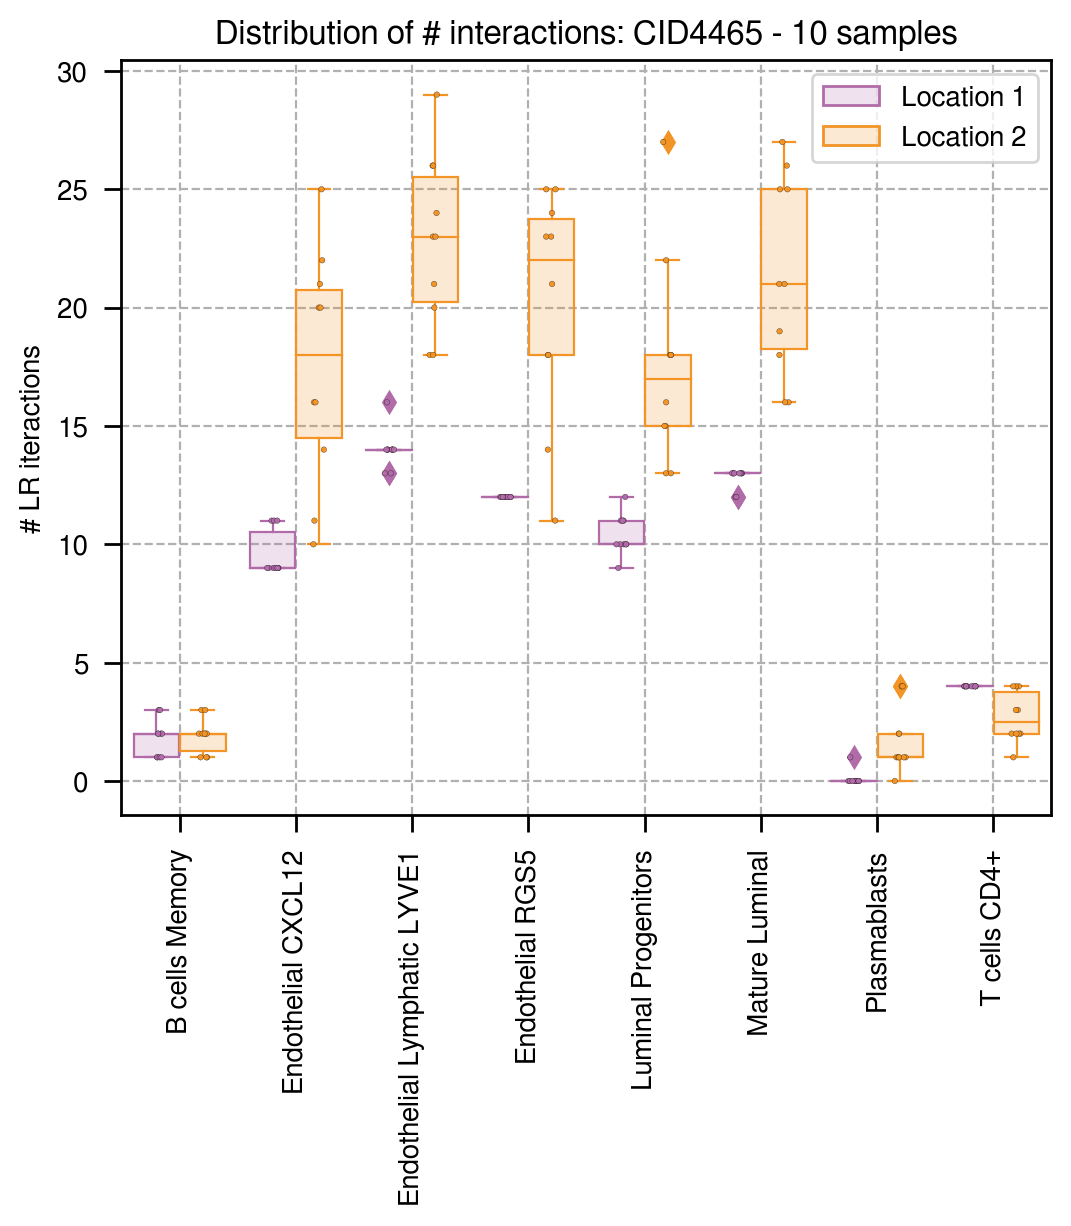

In [28]:
patient = 'CID4465'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
selected_cells = ['Endothelial RGS5', 'Endothelial Lymphatic LYVE1',  'B cells Memory',  'Plasmablasts', 'T cells CD4+', 'Mature Luminal', 'Luminal Progenitors', 'Endothelial CXCL12']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels)
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels, selected_cells)


# CID4535

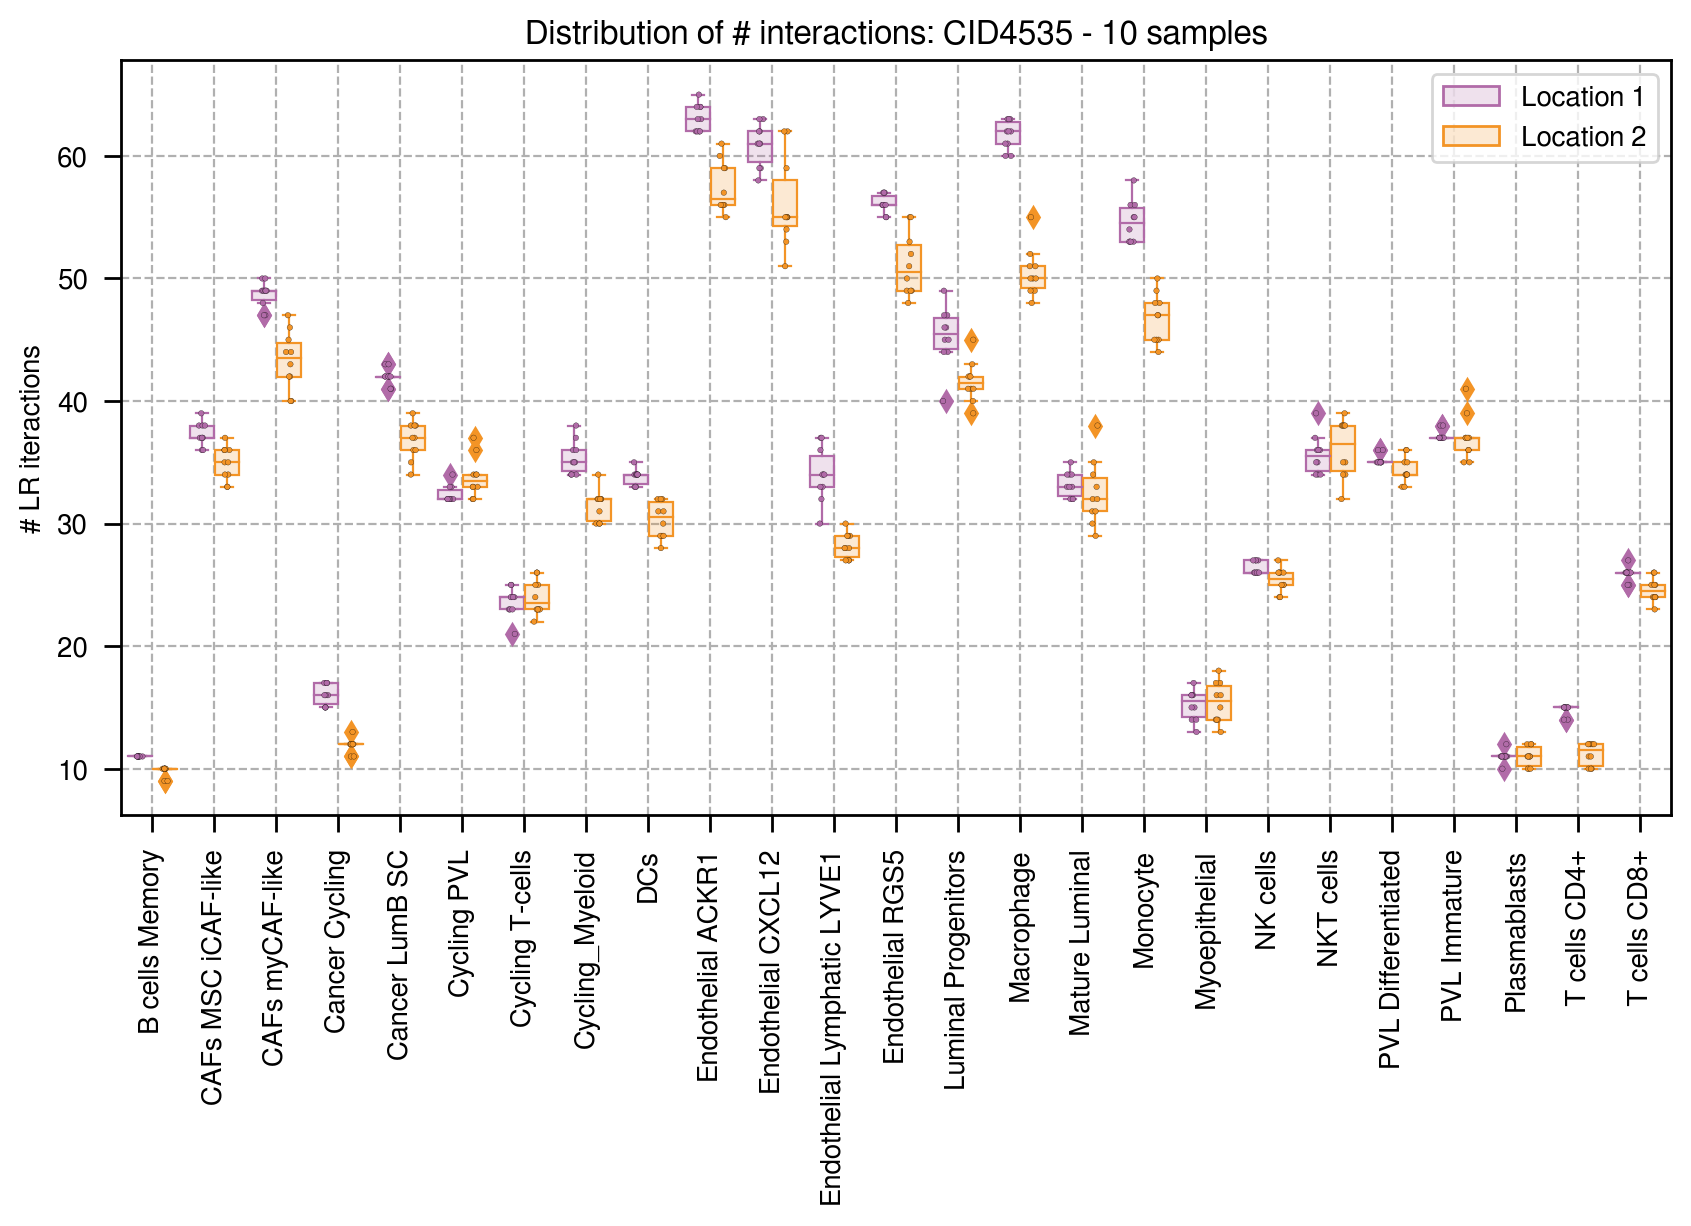

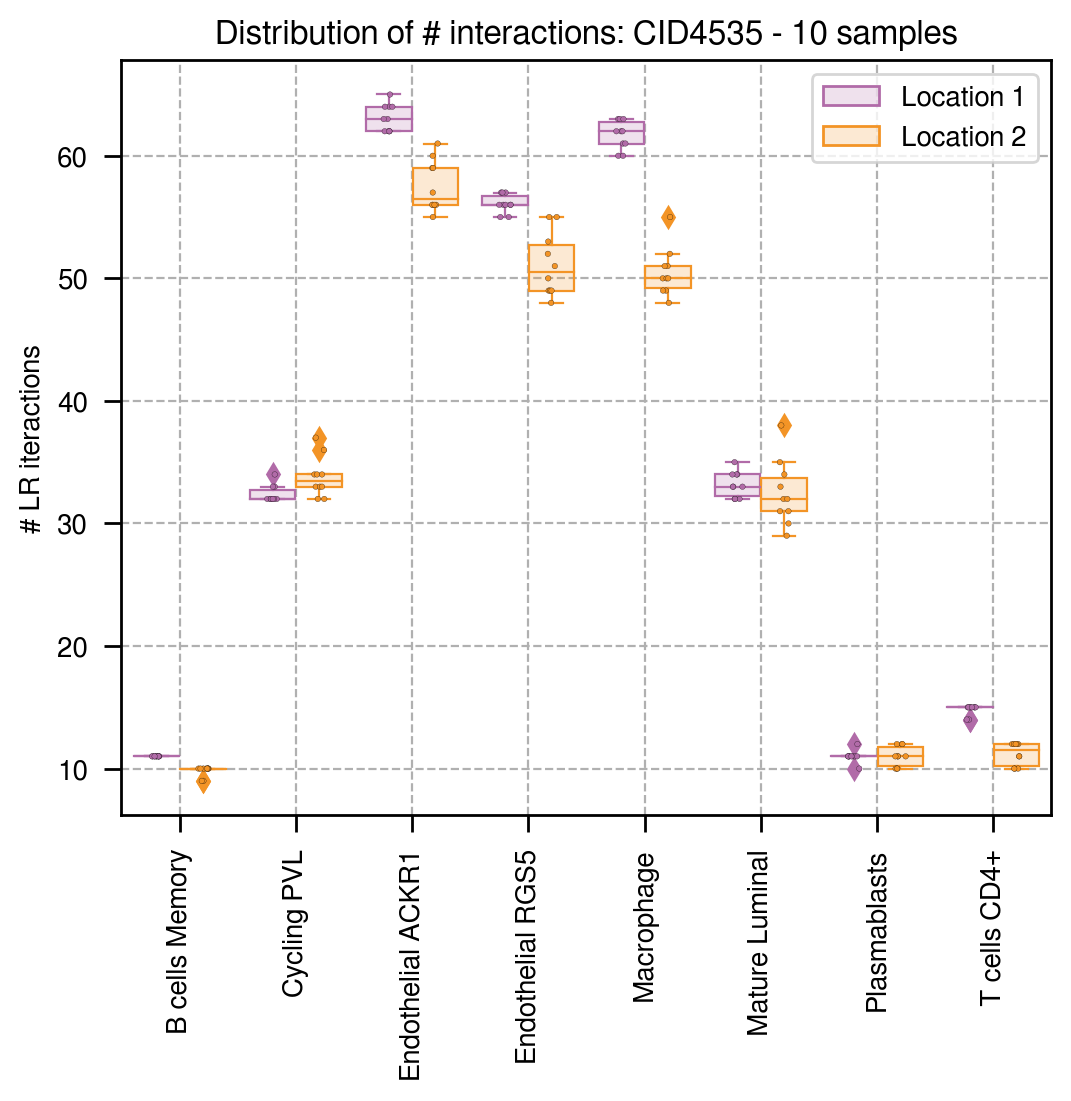

In [29]:
patient = 'CID4535'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
selected_cells = ['Endothelial ACKR1', 'Macrophage',  'B cells Memory',  'Plasmablasts', 'Mature Luminal', 'T cells CD4+', 'Endothelial RGS5', 'Cycling PVL']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels)
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels, selected_cells)

# CID4290

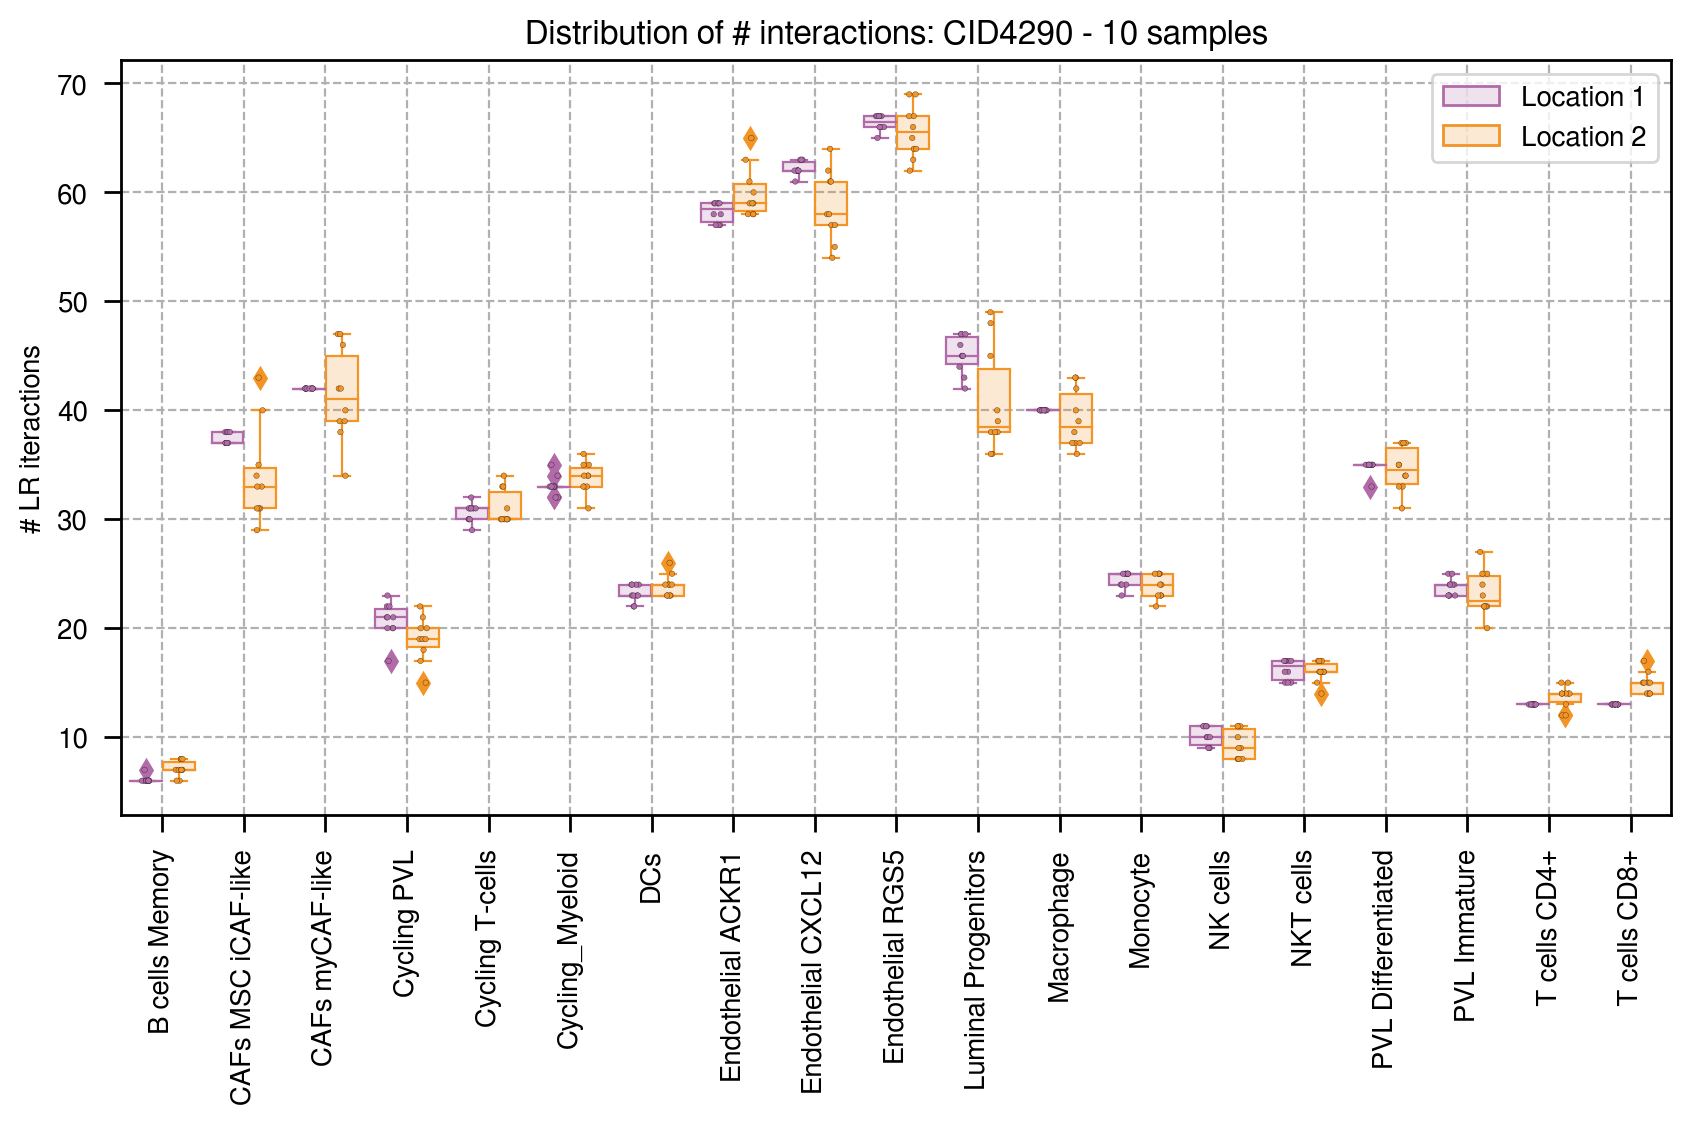

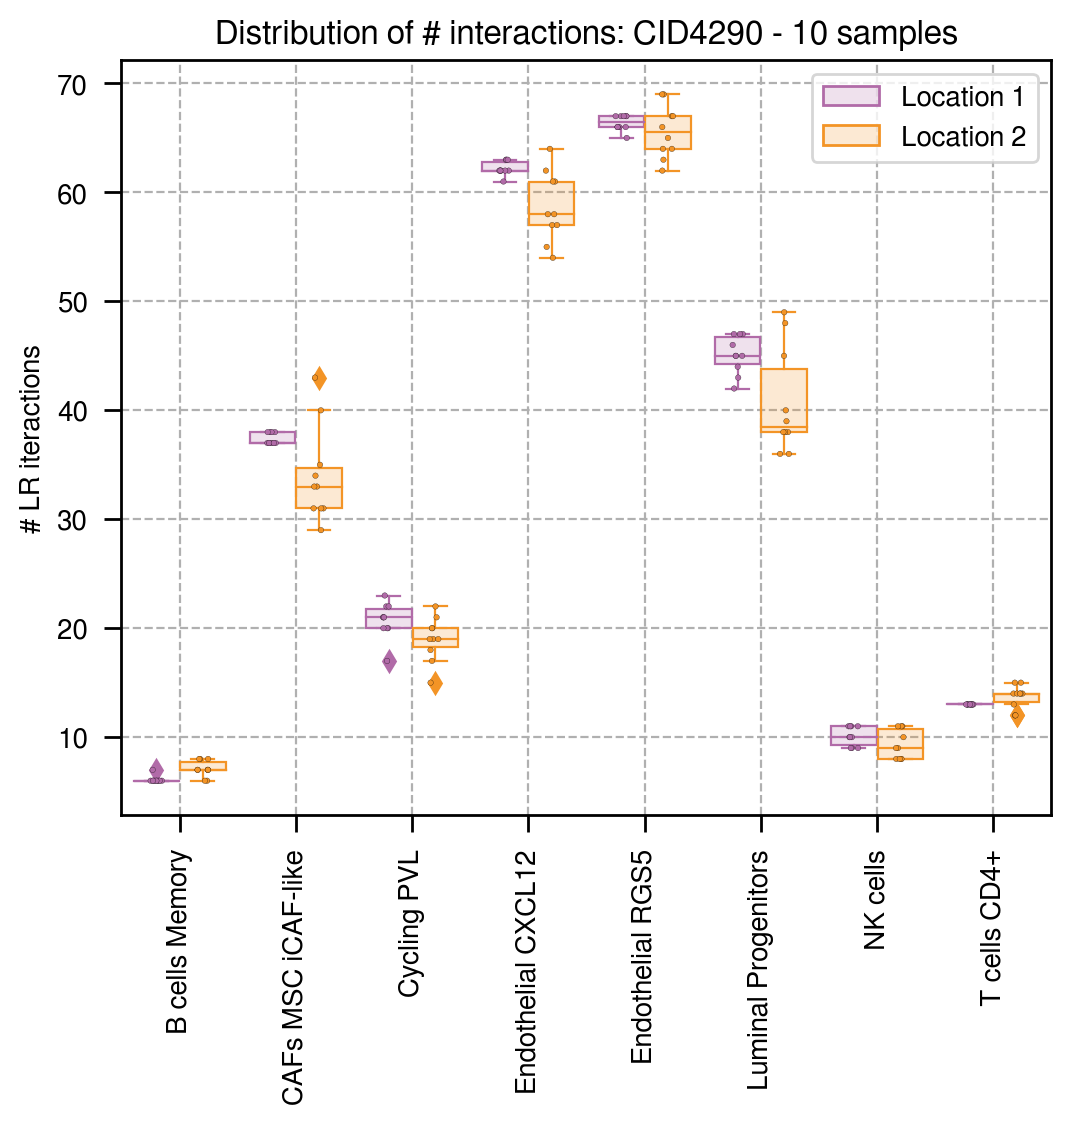

In [30]:
patient = 'CID4290'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
selected_cells = ['Endothelial RGS5', 'Endothelial CXCL12',  'NK cells',  'B cells Memory', 'T cells CD4+', 'CAFs MSC iCAF-like', 'Luminal Progenitors', 'Cycling PVL']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels)
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels, selected_cells)

# CID44971

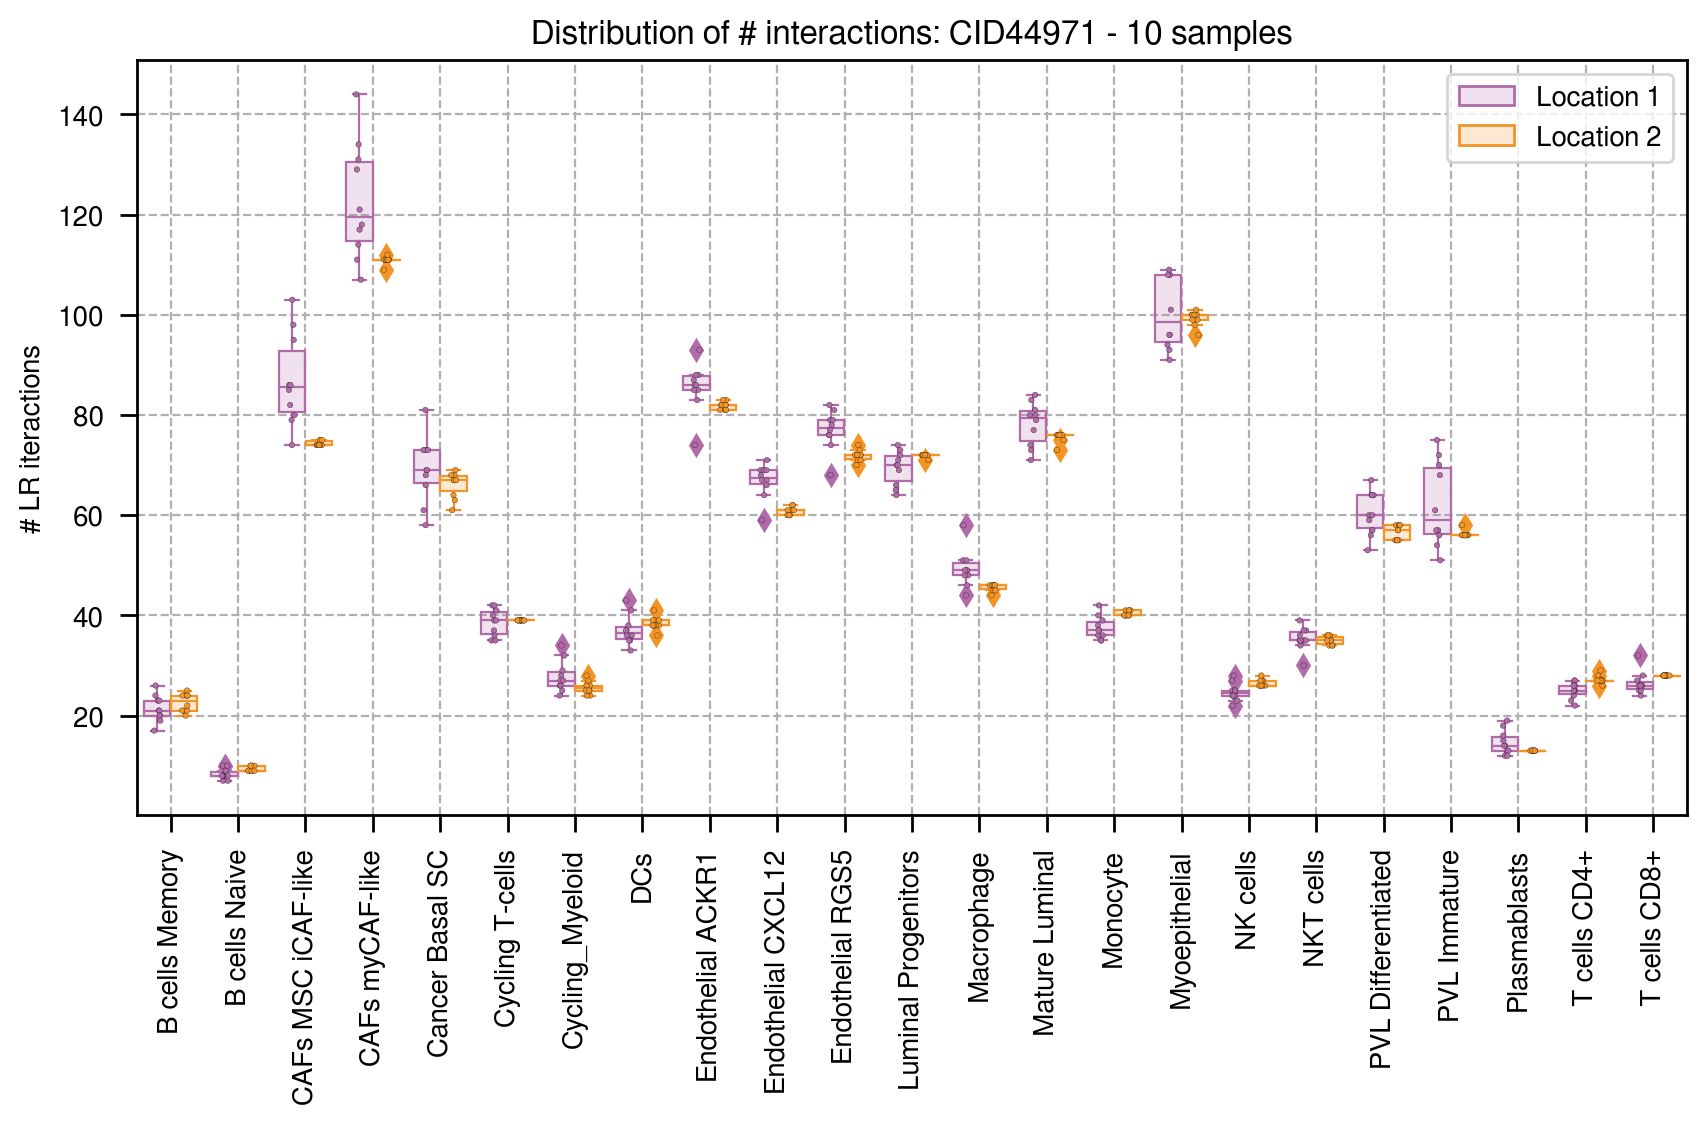

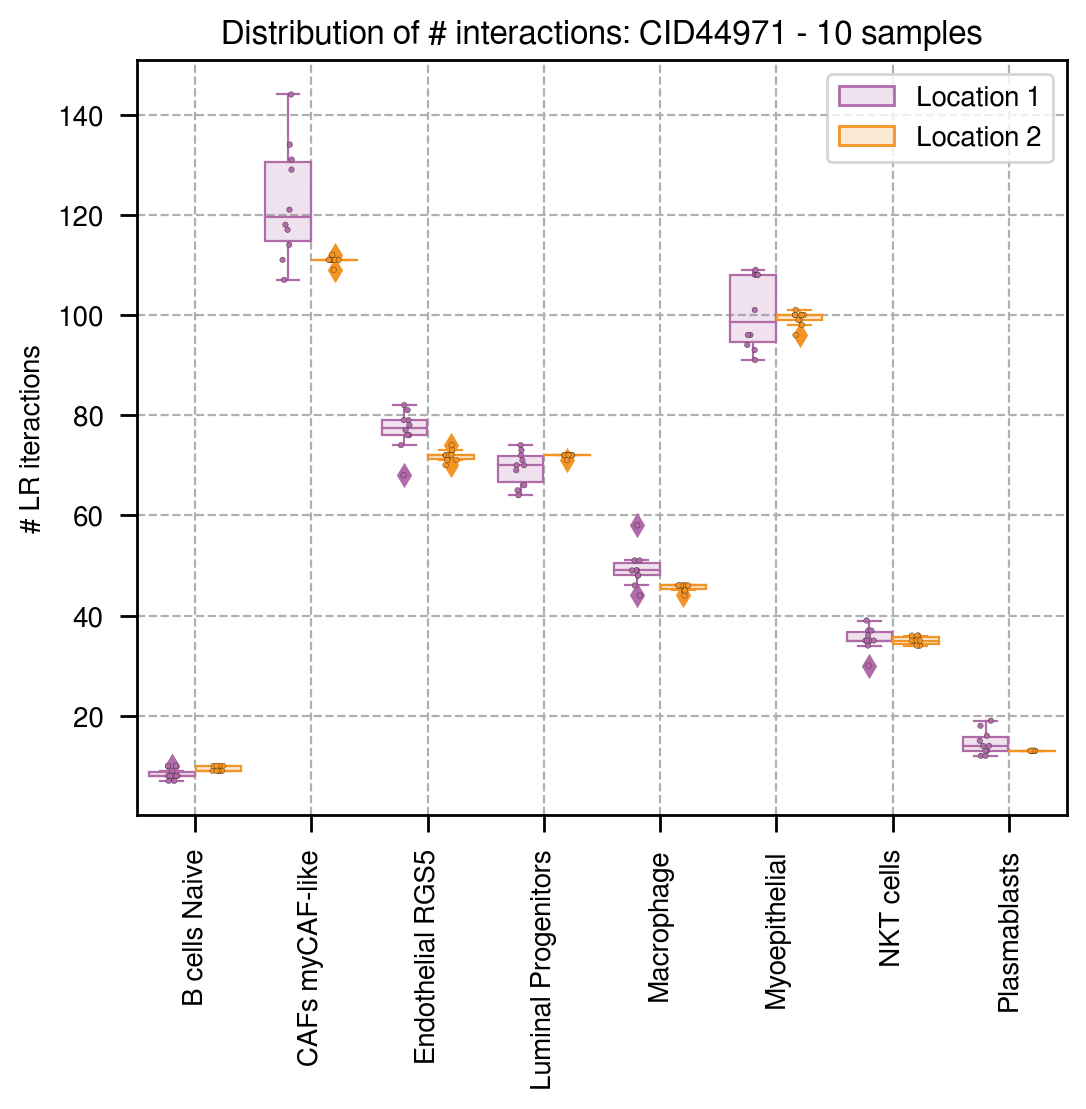

In [31]:
patient = 'CID44971'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'

df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
selected_cells = ['CAFs myCAF-like', 'Myoepithelial',  'B cells Naive',  'Plasmablasts', 'Macrophage', 'Luminal Progenitors', 'Endothelial RGS5', 'NKT cells']

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels)
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
boxplot_subsampling(df_plot, ax, patient, list_loc_labels, selected_cells)

# Grid plot

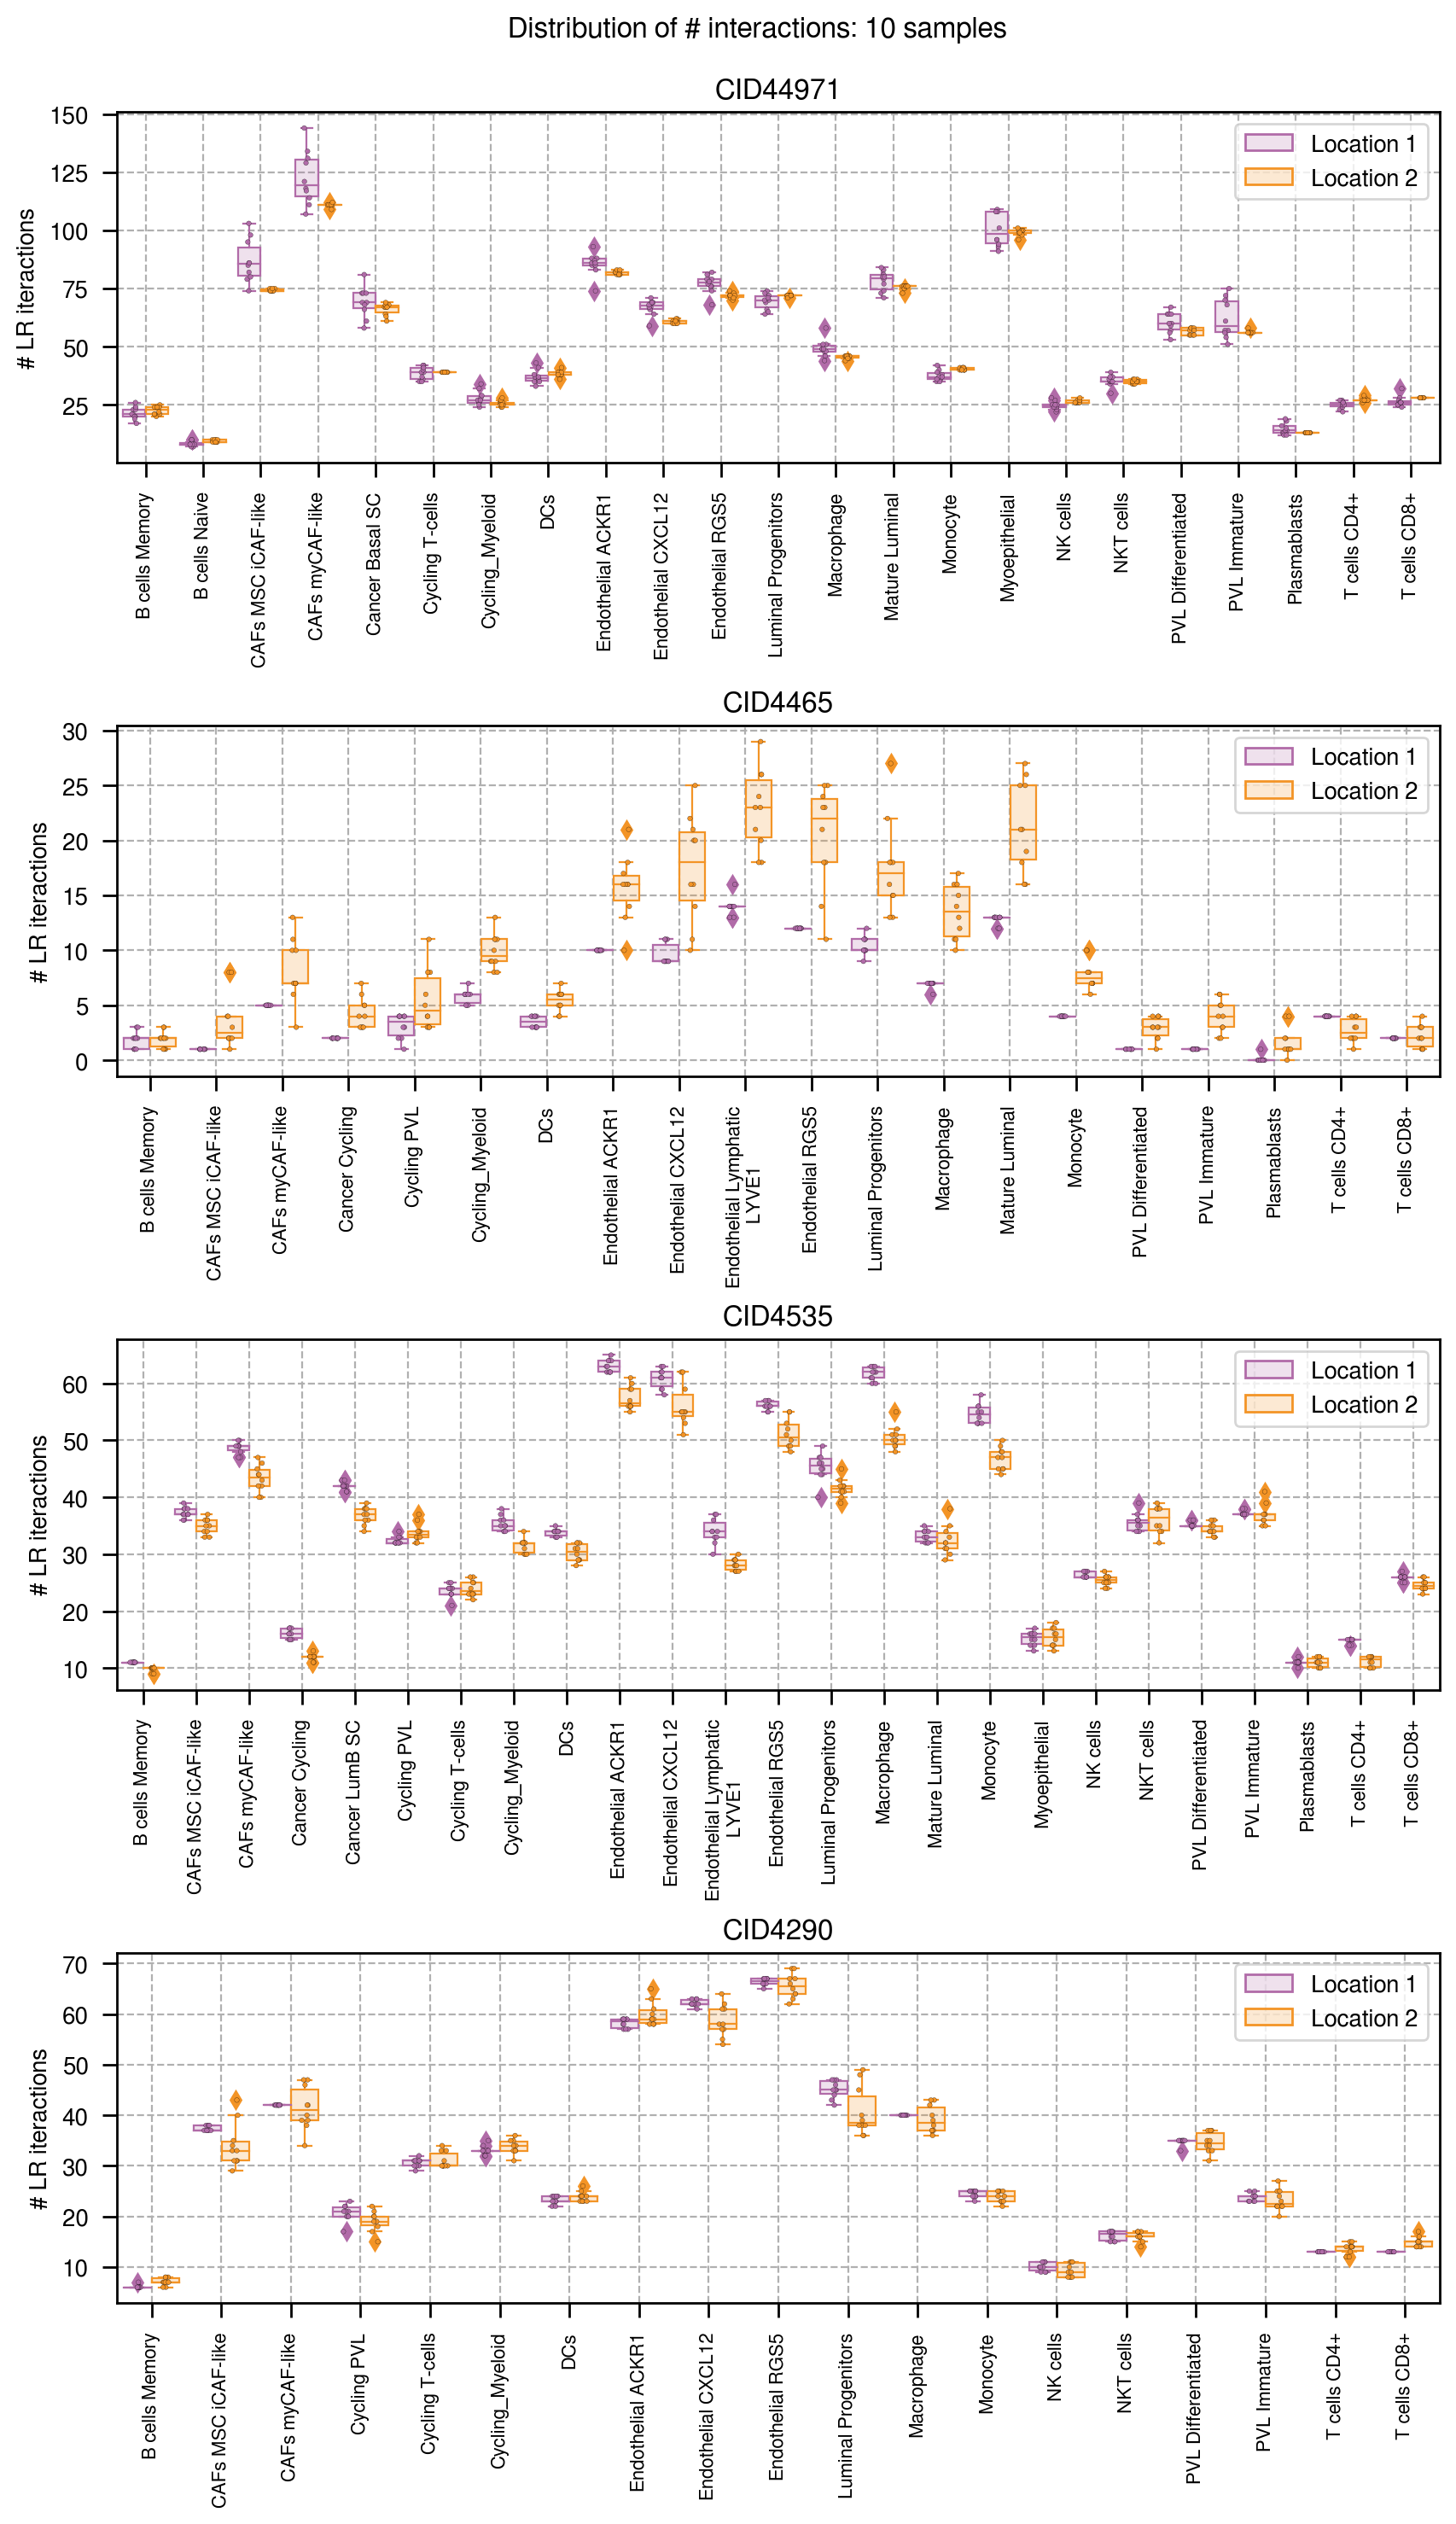

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(10, 17), dpi=200)
plt.subplots_adjust(hspace=0.75)

ax = ax.flatten()


patient = 'CID44971'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[0], patient, list_loc_labels)

patient = 'CID4465'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[1], patient, list_loc_labels)

patient = 'CID4535'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[2], patient, list_loc_labels)

patient = 'CID4290'
out_path = global_path +'Results/Breast/CellPhoneDB/Subsampling/'+patient+'/'
df_plot = pd.read_csv(out_path +'total_subsampling_results.csv')
df_plot = df_plot[~df_plot['index'].isin(list_loc_labels)]
boxplot_subsampling(df_plot, ax[3], patient, list_loc_labels)

plt.suptitle('Distribution of # interactions: 10 samples', y = 0.913)

plt.savefig(global_path+'CP_sampling_Cancer.svg',format='svg', dpi=300 , bbox_inches='tight')
plt.savefig(global_path+'CP_sampling_Cancer.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')